#                                       TYPE OF GLASS PREDICTION

In [28]:
# Import necessary libraries
import numpy as np  # For handling arrays
import pandas as pd  # For handling dataframes (rows, columns)
import matplotlib.pyplot as plt
import seaborn as sns  # For statistical data visualization
from sklearn.preprocessing import LabelEncoder  # For converting categorical values to numerical values
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
import warnings
warnings.filterwarnings('ignore')  # Ignore warning messages during execution

In [29]:
# Reading the dataset from a CSV file named 'glass.csv' into a pandas DataFrame
df = pd.read_csv('glass.csv')

# Displaying the DataFrame to inspect the loaded data
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


# Step 1: Exploring the Dataset

In [30]:
# Renaming columns
df.columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type_of_glass']
df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [31]:
# Displaying the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())


First few rows of the dataset:
   Id       RI     Na    Mg    Al     Si     K    Ca   Ba    Fe  Type_of_glass
0   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00              1
1   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00              1
2   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00              1
3   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00              1
4   6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26              1


In [32]:
# Getting information about data types and missing values
print("\nInformation about the dataset:")
print(df.info())



Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             213 non-null    int64  
 1   RI             213 non-null    float64
 2   Na             213 non-null    float64
 3   Mg             213 non-null    float64
 4   Al             213 non-null    float64
 5   Si             213 non-null    float64
 6   K              213 non-null    float64
 7   Ca             213 non-null    float64
 8   Ba             213 non-null    float64
 9   Fe             213 non-null    float64
 10  Type_of_glass  213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB
None


**OBSERVATION:**

**Data Types:**
The dataset contains both integer (int64) and floating-point (float64) data types.
Columns 0, 1, and 10 are of integer type, while the remaining columns (2 to 9) are of floating-point type.

**Non-Null Counts:**
There are a total of 213 entries (rows) in the dataset.
All columns have 213 non-null entries, indicating that there are no missing values in the dataset.

In [33]:
# Getting statistical summary of numerical attributes
print("\nStatistical summary of numerical attributes:")
print(df.describe())


Statistical summary of numerical attributes:
               Id          RI          Na          Mg          Al          Si  \
count  213.000000  213.000000  213.000000  213.000000  213.000000  213.000000   
mean   108.000000    1.518353   13.406761    2.676056    1.446526   72.655023   
std     61.631972    0.003039    0.818371    1.440453    0.499882    0.774052   
min      2.000000    1.511150   10.730000    0.000000    0.290000   69.810000   
25%     55.000000    1.516520   12.900000    2.090000    1.190000   72.280000   
50%    108.000000    1.517680   13.300000    3.480000    1.360000   72.790000   
75%    161.000000    1.519150   13.830000    3.600000    1.630000   73.090000   
max    214.000000    1.533930   17.380000    3.980000    3.500000   75.410000   

                K          Ca          Ba          Fe  Type_of_glass  
count  213.000000  213.000000  213.000000  213.000000     213.000000  
mean     0.499108    8.957934    0.175869    0.057277       2.788732  
std      0.

In [34]:
# Checking null values in the DataFrame
null_values = df.isnull().sum()

# Display the number of null values in each column
print("Number of null values in each column:")
print(null_values)

Number of null values in each column:
Id               0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type_of_glass    0
dtype: int64


**Based on the above statistical summary, it seems that the columns have numerical values, and there is no immediate need for encoding in the traditional sense.**

# Step 2: Data Visualization

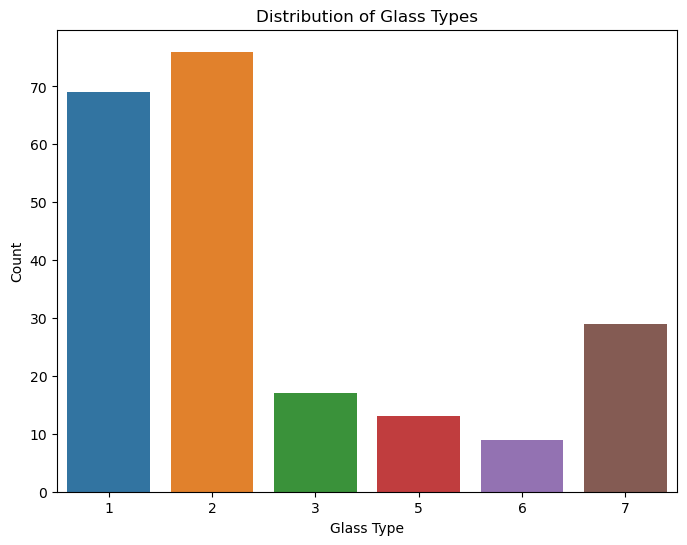

In [35]:

import seaborn as sns
import matplotlib.pyplot as plt

# Exploring the distribution of the target variable 'Type_of_glass'
plt.figure(figsize=(8, 6))
sns.countplot(x='Type_of_glass', data=df)
plt.title('Distribution of Glass Types')
plt.xlabel('Glass Type')
plt.ylabel('Count')
plt.show()


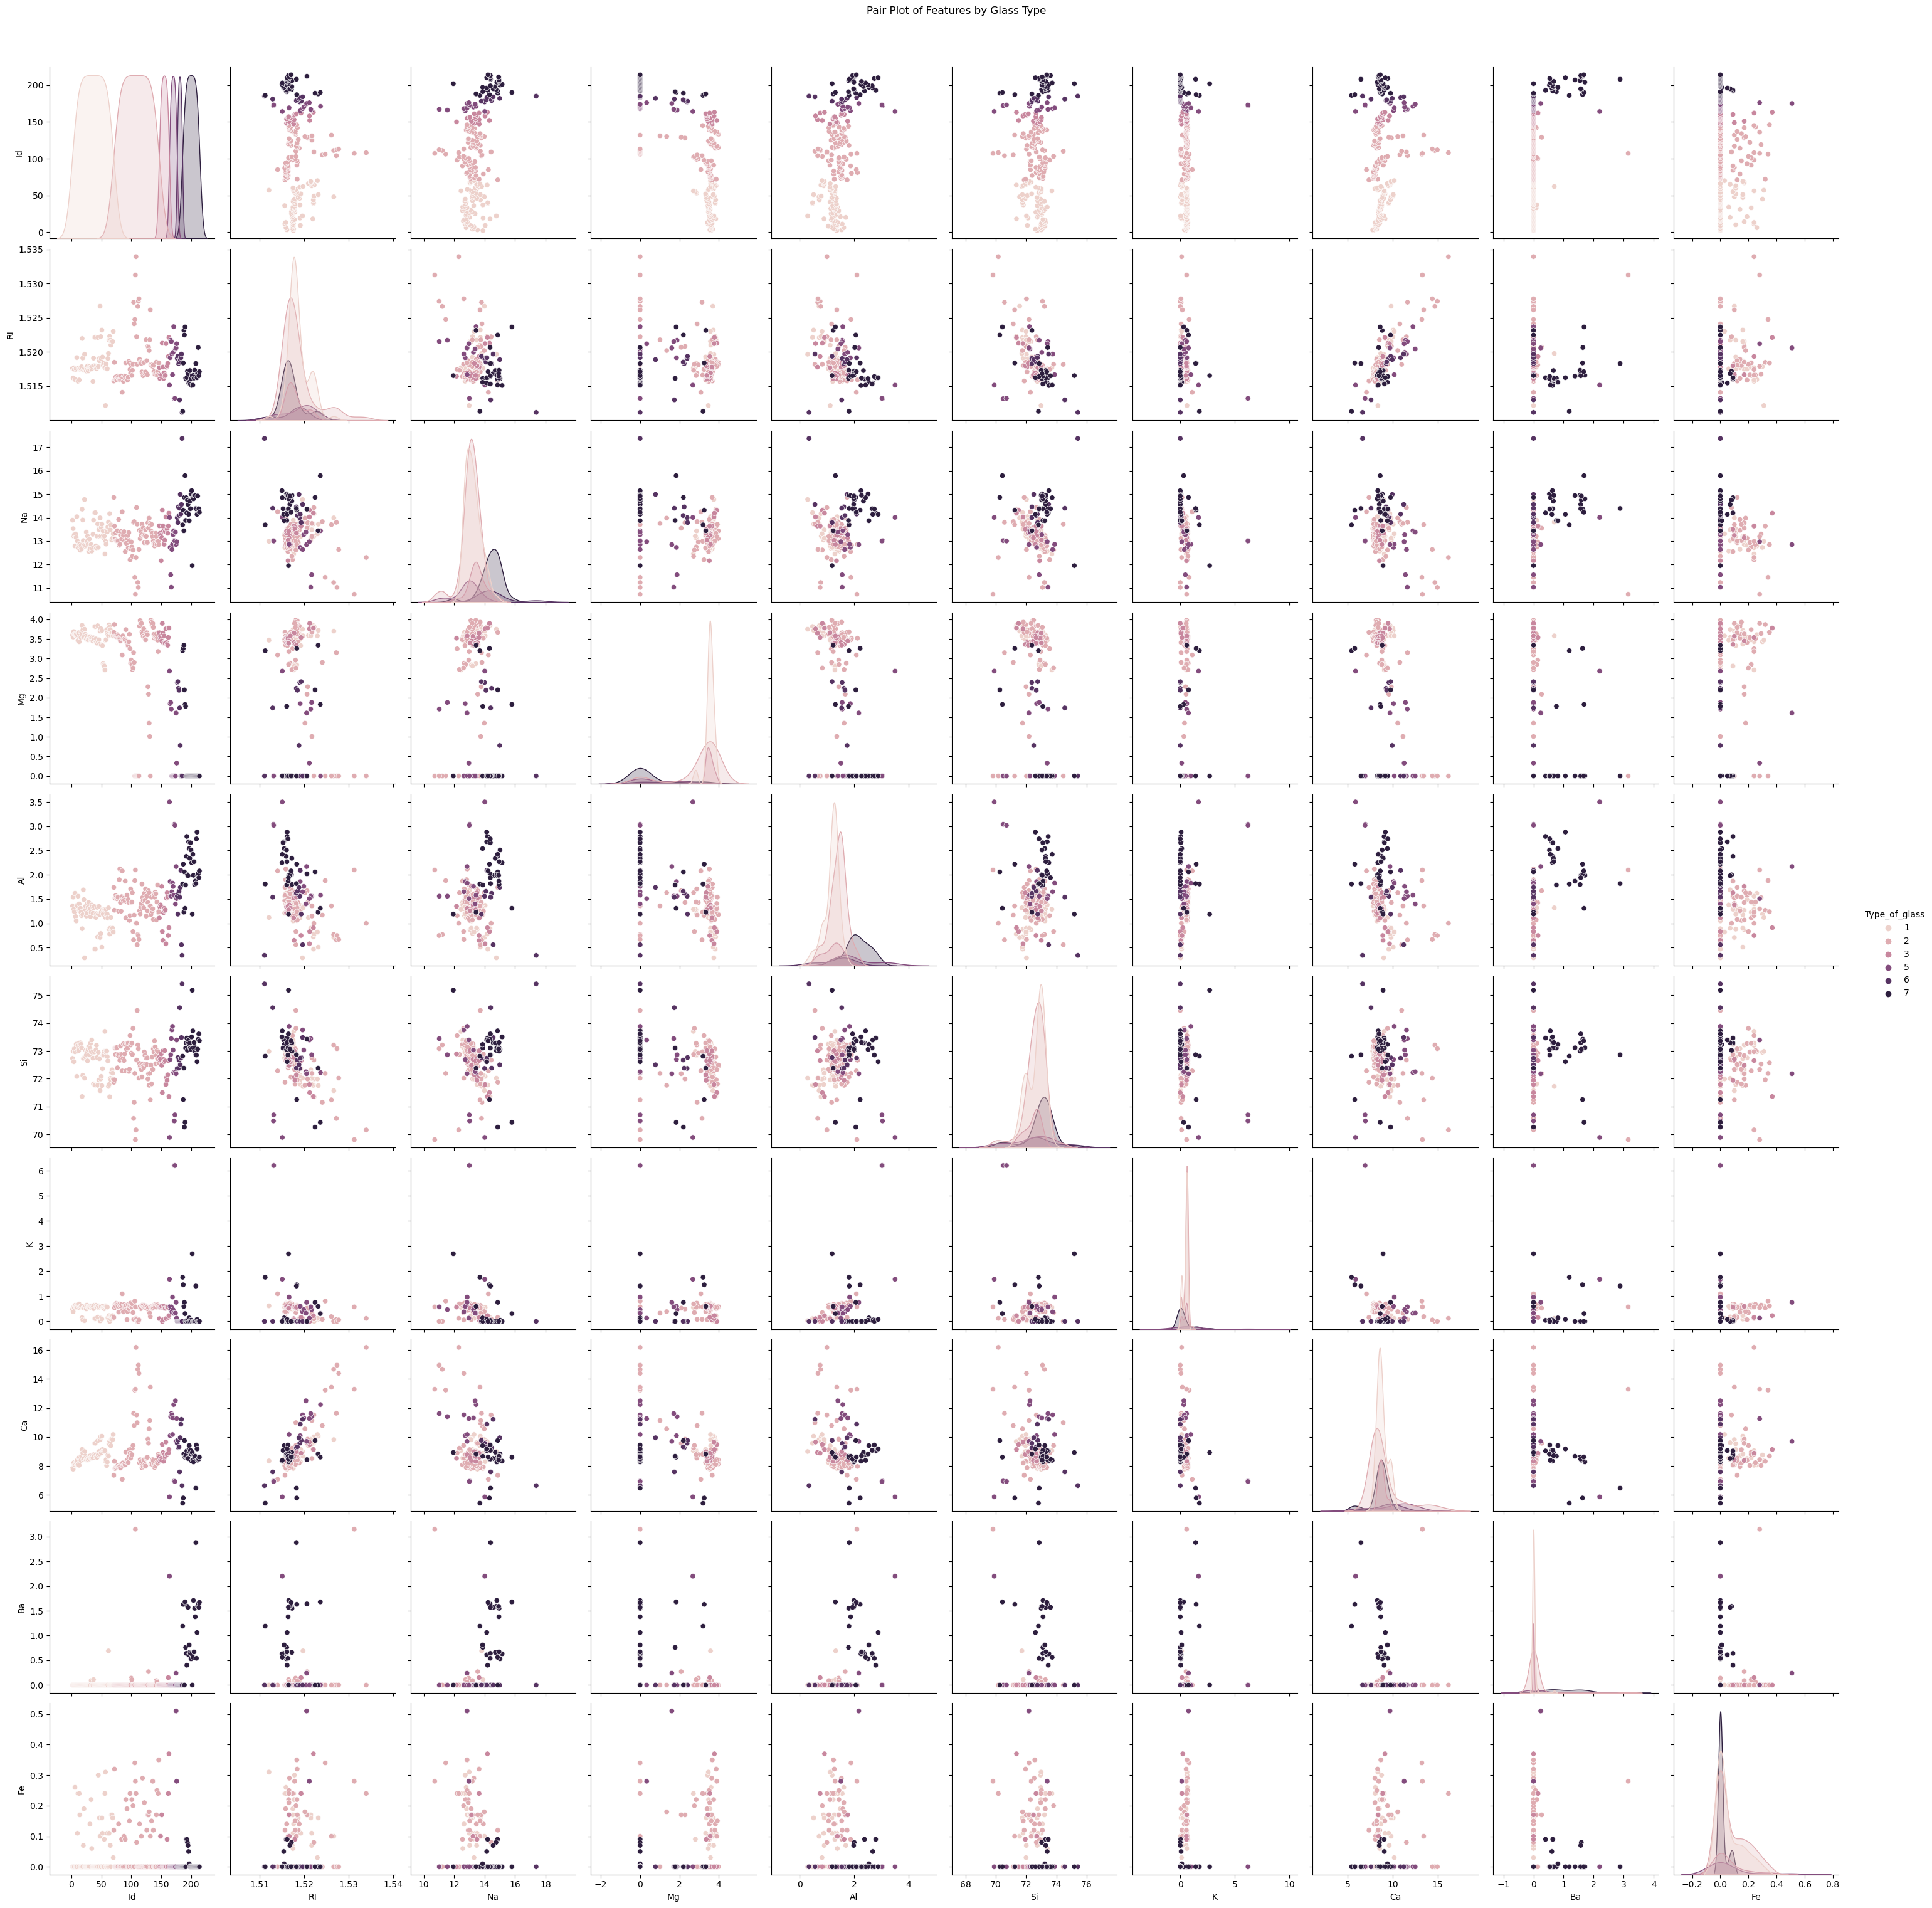

In [36]:
# Exploring relationships between features using a pair plot
sns.pairplot(df, hue='Type_of_glass', height=3)  # Adjusting the height as needed
plt.suptitle('Pair Plot of Features by Glass Type', y=1.02)
plt.show()

# Step 3: Data Splitting

In [37]:
from sklearn.model_selection import train_test_split

# Features (X) and Target variable (y)
X = df.drop(columns=['Id', 'Type_of_glass'])  # Features
y = df['Type_of_glass']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (170, 9)
Shape of X_test: (43, 9)
Shape of y_train: (170,)
Shape of y_test: (43,)


# Step 4: Model Training ,Testing and Evaluation

In [41]:
# Importing Decision Tree model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

# Creating a Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Fitting the model to the training data
decision_tree_model.fit(X_train, y_train)

# Making predictions on the test data
predictions_dt = decision_tree_model.predict(X_test)

# Calculating accuracy
accuracy_dt = accuracy_score(y_test, predictions_dt)

# Printing the accuracy
print("Decision Tree Model Accuracy:", accuracy_dt)

# Printing confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions_dt))

# Printing classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions_dt))


Decision Tree Model Accuracy: 0.6744186046511628

Confusion Matrix:
[[7 0 2 0 0 1]
 [3 9 1 1 1 0]
 [0 1 2 0 0 0]
 [0 0 0 3 0 0]
 [0 3 0 0 0 0]
 [0 0 1 0 0 8]]

Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.70      0.70        10
           2       0.69      0.60      0.64        15
           3       0.33      0.67      0.44         3
           5       0.75      1.00      0.86         3
           6       0.00      0.00      0.00         3
           7       0.89      0.89      0.89         9

    accuracy                           0.67        43
   macro avg       0.56      0.64      0.59        43
weighted avg       0.67      0.67      0.66        43



In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Creating a Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Performing 5-fold cross-validation
cross_val_scores_dt = cross_val_score(decision_tree_model, X_train, y_train, cv=5)

# Printing cross-validation scores
print("Decision Tree Cross-Validation Scores:", cross_val_scores_dt)
print("Mean Cross-Validation Score:", cross_val_scores_dt.mean())


Decision Tree Cross-Validation Scores: [0.73529412 0.73529412 0.70588235 0.73529412 0.61764706]
Mean Cross-Validation Score: 0.7058823529411765


**Accuracy: The Decision Tree model achieved an accuracy of approximately 67.44% on the test set.
The cross-validation process involves training the Decision Tree model on different subsets of the training data (folds) and evaluating its performance. The mean cross-validation score provides an aggregated measure of how well the model generalizes to unseen data. In this case, the Decision Tree model achieves an average accuracy of around 70.59% across the folds.**

In [42]:
# Importing Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Creating a Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Fitting the model to the training data
random_forest_model.fit(X_train, y_train)

# Making predictions on the test data
predictions_rf = random_forest_model.predict(X_test)

# Calculating accuracy
accuracy_rf = accuracy_score(y_test, predictions_rf)

# Printing the accuracy
print("\nRandom Forest Model Accuracy:", accuracy_rf)

# Printing confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions_rf))

# Printing classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions_rf))



Random Forest Model Accuracy: 0.7209302325581395

Confusion Matrix:
[[ 7  3  0  0  0  0]
 [ 2 12  0  1  0  0]
 [ 1  0  2  0  0  0]
 [ 0  2  0  1  0  0]
 [ 0  1  0  0  2  0]
 [ 0  2  0  0  0  7]]

Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.70      0.70        10
           2       0.60      0.80      0.69        15
           3       1.00      0.67      0.80         3
           5       0.50      0.33      0.40         3
           6       1.00      0.67      0.80         3
           7       1.00      0.78      0.88         9

    accuracy                           0.72        43
   macro avg       0.80      0.66      0.71        43
weighted avg       0.76      0.72      0.72        43



In [45]:
from sklearn.ensemble import RandomForestClassifier

# Creating a Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Performing 5-fold cross-validation
cross_val_scores_rf = cross_val_score(random_forest_model, X_train, y_train, cv=5)

# Printing cross-validation scores
print("\nRandom Forest Cross-Validation Scores:", cross_val_scores_rf)
print("Mean Cross-Validation Score:", cross_val_scores_rf.mean())



Random Forest Cross-Validation Scores: [0.76470588 0.85294118 0.73529412 0.85294118 0.73529412]
Mean Cross-Validation Score: 0.7882352941176471


**Accuracy: The Random Forest model achieved an accuracy of approximately 72.09% on the test set.The Random Forest model demonstrates an improved performance compared to the Decision Tree model during cross-validation. The average accuracy across different folds is approximately 78.82%, indicating that the Random Forest model generalizes well to diverse subsets of the training data.**

In [43]:
# Importing SVM model
from sklearn.svm import SVC

# Creating an SVM model
svm_model = SVC(random_state=42)

# Fitting the model to the training data
svm_model.fit(X_train, y_train)

# Making predictions on the test data
predictions_svm = svm_model.predict(X_test)

# Calculating accuracy
accuracy_svm = accuracy_score(y_test, predictions_svm)

# Printing the accuracy
print("\nSVM Model Accuracy:", accuracy_svm)

# Printing confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions_svm))

# Printing classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions_svm))



SVM Model Accuracy: 0.3488372093023256

Confusion Matrix:
[[ 0 10  0  0  0  0]
 [ 0 15  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  9  0  0  0  0]]

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.35      1.00      0.52        15
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         9

    accuracy                           0.35        43
   macro avg       0.06      0.17      0.09        43
weighted avg       0.12      0.35      0.18        43



In [46]:
from sklearn.svm import SVC

# Creating an SVM model
svm_model = SVC(random_state=42)

# Performing 5-fold cross-validation
cross_val_scores_svm = cross_val_score(svm_model, X_train, y_train, cv=5)

# Printing cross-validation scores
print("\nSVM Cross-Validation Scores:", cross_val_scores_svm)
print("Mean Cross-Validation Score:", cross_val_scores_svm.mean())



SVM Cross-Validation Scores: [0.38235294 0.35294118 0.35294118 0.35294118 0.35294118]
Mean Cross-Validation Score: 0.35882352941176476


**Accuracy: The SVM model achieved an accuracy of approximately 34.88% on the test set.The SVM model, based on these cross-validation scores, exhibits a lower average accuracy compared to both the Decision Tree and Random Forest models. The mean cross-validation score of approximately 35.88% suggests that the SVM model is not performing as well on the training data as the other models.**

# Step 5: Hyperparameter Tunning

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Creating a Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Defining the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Creating GridSearchCV object
grid_search = GridSearchCV(random_forest_model, param_grid, cv=5, scoring='accuracy')

# Fitting the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_

# Printing the best hyperparameters
print("Best Hyperparameters:", best_params)

# Getting the best model
best_model = grid_search.best_estimator_

# Evaluating the best model on the test set
best_model_accuracy = best_model.score(X_test, y_test)
print("Accuracy of the Best Model on Test Set:", best_model_accuracy)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy of the Best Model on Test Set: 0.7209302325581395


**Observation based on the hyperparameter tuning results for the Random Forest model:**

Best Hyperparameters: The grid search has determined that the best hyperparameters for the Random Forest model are:

max_depth: None (indicating no maximum depth)
min_samples_leaf: 1
min_samples_split: 2
n_estimators: 100
Accuracy of the Best Model on Test Set: The best model, trained with the identified hyperparameters, achieves an accuracy of approximately 72.09% on the test set.

# ROC AND AUC PLOT

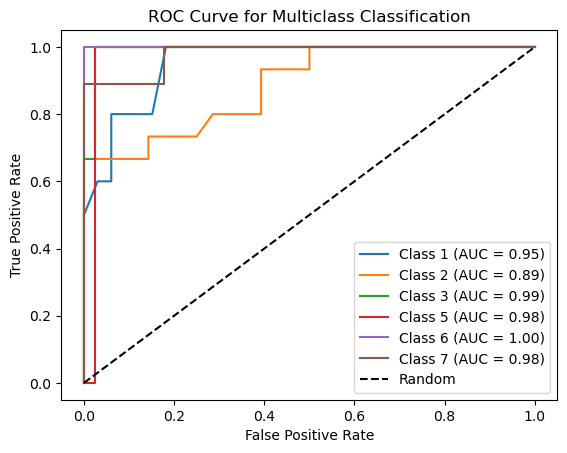

In [53]:
from sklearn.metrics import plot_roc_curve, roc_curve, auc 

# Assuming 'grid_search' is your GridSearchCV object containing the best estimator

# One-vs-Rest ROC curve for each class
fig, ax = plt.subplots()

# Plot ROC curve for each class
for i in range(len(grid_search.best_estimator_.classes_)):
    class_label = grid_search.best_estimator_.classes_[i]
    y_true_class = (y_test == class_label).astype(int)
    y_prob_class = grid_search.best_estimator_.predict_proba(X_test)[:, i]

    # Compute ROC curve and AUC for each class
    fpr, tpr, _ = roc_curve(y_true_class, y_prob_class)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for each class
    ax.plot(fpr, tpr, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

ax.plot([0, 1], [0, 1], 'k--', label='Random')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve for Multiclass Classification')
ax.legend(loc='lower right')
plt.show()



# Step 6: Prediction

In [54]:
import pandas as pd

# Assuming a DataFrame with new features
# Replacing this with actual new data
new_data = pd.DataFrame({
    'RI': [1.518, 1.525],
    'Na': [13.5, 12.8],
    'Mg': [3.2, 4.0],
    'Al': [1.2, 1.5],
    'Si': [72.5, 73.0],
    'K': [0.5, 0.3],
    'Ca': [8.8, 9.2],
    'Ba': [0.2, 0.0],
    'Fe': [0.0, 0.1]
})

# Making predictions on the new data
new_predictions = best_model.predict(new_data)

# Printing the predicted glass types
print("Predicted Glass Types:", new_predictions)


Predicted Glass Types: [1 2]


# Step 7: Saving the Model

In [55]:
from joblib import dump

# Assuming 'grid_search' is your GridSearchCV object containing the best estimator

# Save the model to a file
dump(grid_search.best_estimator_, 'random_forest_model.joblib')

# Print a message indicating the model is saved
print("Model saved as 'random_forest_model.joblib'")

Model saved as 'random_forest_model.joblib'
